In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [19]:
# read the csv file
input_data = pd.read_csv('root_cause_analysis.csv')

print("\nData type\n--------------")
print(input_data.dtypes)
print("\ninput data\n----------------")
input_data.head()


Data type
--------------
ID                   int64
CPU_LOAD             int64
MEMORY_LEAK_LOAD     int64
DELAY                int64
ERROR_1000           int64
ERROR_1001           int64
ERROR_1002           int64
ERROR_1003           int64
ROOT_CAUSE          object
dtype: object

input data
----------------


,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,MEMORY_LEAK
1,2,0,0,0,0,0,0,1,MEMORY_LEAK
2,3,0,1,1,0,0,1,1,MEMORY_LEAK
3,4,0,1,0,1,1,0,1,MEMORY_LEAK
4,5,1,1,0,1,0,1,0,NETWORK_DELAY


In [20]:
# Convert target variable to numeric representation
label_encoder = preprocessing.LabelEncoder()
input_data['ROOT_CAUSE'] = label_encoder.fit_transform(input_data['ROOT_CAUSE'])

# convert to numpy array
input_data = input_data.to_numpy().astype(float)

In [22]:
# split the data
x_data = input_data[:,1:8]
y_data = input_data[:,8]

# convert target variable to one-hot-encoding array
y_data = tf.keras.utils.to_categorical(y_data,3)

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.1)

print("\nTraining feature data size: ",x_train.shape)
print("\nTraining target data size: ",y_train.shape)


Training feature data size:  (900, 7)

Training target data size:  (900, 3)


In [27]:
# Building and Training the model

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

# set up hyperparameters for the model
NB_CLASSES = 3
N_HIDDEN = 128
BATCH_SIZE = 64
VERBOSE = 1
EPOCHS = 20
VALIDATION_SPLIT = 0.2

model = tf.keras.models.Sequential()

# Add a hidden layer
model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape = (7,),
                             name = "Hidden_layer_1",
                             activation = 'relu'))

# Add a hidden layer
model.add(keras.layers.Dense(N_HIDDEN,
                             name = "Hidden_layer_2",
                             activation = 'relu'))

# Add output layer
model.add(keras.layers.Dense(3,
                             name = "Output_layer",
                             activation = "softmax"))

# compile the model
model.compile(loss="categorical_crossentropy",
              metrics=['accuracy'])

# summarise the model
model.summary()

print("\nTraining in progress\n------------------")

# Train the model
history = model.fit(x_data,
                    y_data,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = VERBOSE,
                    validation_split = VALIDATION_SPLIT)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_1 (Dense)      (None, 128)               1024      
                                                                 
 Hidden_layer_2 (Dense)      (None, 128)               16512     
                                                                 
 Output_layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,923
Trainable params: 17,923
Non-trainable params: 0
_________________________________________________________________

Training in progress
------------------
Epoch 1/20
13/13 [==============================] - 0s 4ms/step - loss: 0.8706 - accuracy: 0.6963 - val_loss: 0.7367 - val_accuracy: 0.7700
Epoch 2/20
13/13 [==============================] - 0s 1ms/step - loss: 0.5997 - accuracy: 0.8050 - val_loss: 0.5945 - val_accuracy: 


Training accuracy


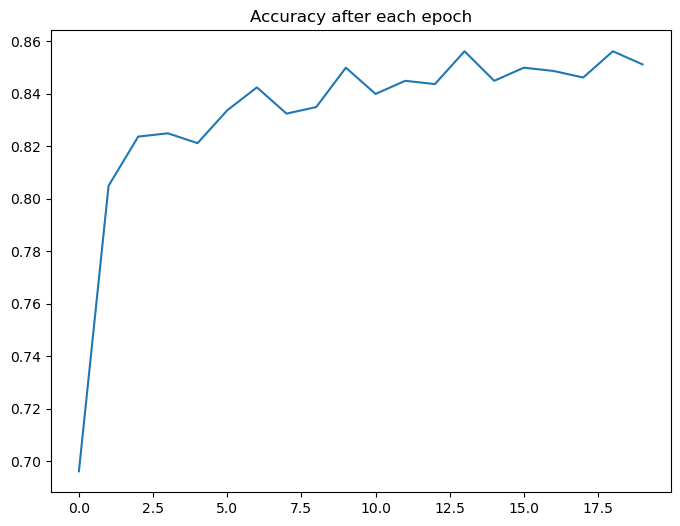

In [30]:
# plot accuracy of model after each epoch
print("\nTraining accuracy")
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,6))
plt.title("Accuracy after each epoch")
plt.show()

In [31]:
# evaluate the model
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 930us/step - loss: 0.3846 - accuracy: 0.8700


[0.3846210241317749, 0.8700000047683716]

In [34]:
import numpy as np
# raw predicting the model
CPU_LOAD = 1
MEMORY_LEAK_LOAD = 0
DELAY = 1
ERROR_1000 = 0
ERROR_1001 = 1
ERROR_1002 = 0
ERROR_1003 = 1

prediction = np.argmax(model.predict([[CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003]),axis=1)
print("From the raw data it is observed that root cause: ",label_encoder.inverse_transform(prediction))

ValueError: in user code:

    File "/Users/syanthan/anaconda3/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "/Users/syanthan/anaconda3/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/syanthan/anaconda3/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/syanthan/anaconda3/envs/deeplearning/lib/python3.8/site-packages/keras/engine/training.py", line 2079, in predict_step
        return self(x, training=False)
    File "/Users/syanthan/anaconda3/envs/deeplearning/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/syanthan/anaconda3/envs/deeplearning/lib/python3.8/site-packages/keras/engine/input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "Hidden_layer_1" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int64)
      • training=False
      • mask=None
